In [1]:
%load_ext autoreload
%autoreload 2
import os

import numpy as np
import pandas as pd

import fairlearn.moments as moments

from load_data import load_adult, load_compas


from util import experiment, plot



# In order to make debugging easier, leave the following two wrapper functions in this notebook rather than put them into
# util.py for now.


        
log_dir = 'experiment_log/'
if not os.path.isdir(log_dir):
    os.mkdir(log_dir)


In [17]:
from random import seed
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)


dataset = 'adultr'
rho = [0.2, 0.2]
frac = 1 
eps_list = [0.002 * i for i in range(1, 10)]
criteria = 'DP'
classifier = 'Agarwal'
trials = 3
include_sensible = False
filename = log_dir+'all_data_'+dataset+','+str(rho[0])+','+str(rho[1])+','+str(frac)+','+criteria \
           +','+classifier+','+str(trials)+','+str(include_sensible)+'.pickle'
verbose = False

all_data = experiment(dataset, rho, frac, eps_list, criteria, classifier, trials, include_sensible, filename, verbose)

plot(filename)

Looking for file 'datasets/adult.data' in the current directory...
File found in current directory..
Looking for file 'datasets/adult.test' in the current directory...
File found in current directory..


/Users/ZiyuanZhong/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ZiyuanZhong/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The dataset is loaded...
Looking for file 'datasets/compas-scores-two-years.csv' in the current directory...
File found in current directory..

Number of people recidivating within two years
0    2795
1    2483
dtype: int64


{'race': array([0, 0, 1, ..., 0, 0, 0])}
Features we will be using for classification are: ['intercept', 'age_cat_25 - 45', 'age_cat_Greater than 45', 'age_cat_Less than 25', 'race', 'sex', 'priors_count', 'c_charge_degree'] 

(5278, 9) 2483.0
trial: 0 time: 3.0994415283203125e-06


KeyboardInterrupt: 

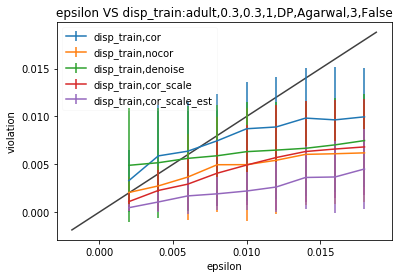

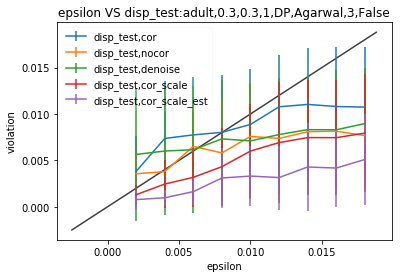

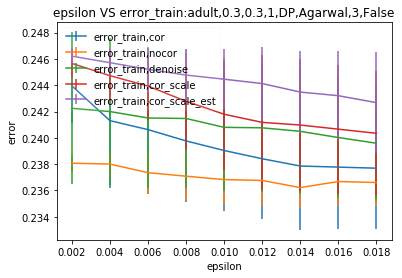

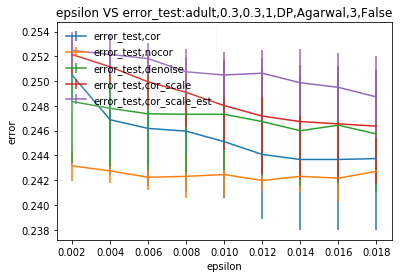

In [15]:
dataset = 'adult'
rho = [0.3, 0.3]
frac = 1
eps_list = [0.002 * i for i in range(1, 10)]
criteria = 'DP'
classifier = 'Agarwal'
trials = 3
include_sensible = False
filename = log_dir+'all_data_'+dataset+','+str(rho[0])+','+str(rho[1])+','+str(frac)+','+criteria \
           +','+classifier+','+str(trials)+','+str(include_sensible)+'.pickle'

plot(filename)